In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [2]:
save_folder = os.path.join("results","images")

In [3]:
filepath = os.path.join("results","radar_target_recognition_snr_with_jitter.csv")

df = pd.read_csv(filepath)
print(df.head().to_string())
df.head()

                             run_id       experiment_id    status                                                                                            artifact_uri                        start_time                          end_time  accuracy  accuracy_single noise_method fusion_method  n_radars azimuth_jitter_bounds  azimuth_jitter_width  num_points  elevation_spread  elevation_center  SNR_constraint  random_seed  elevation_jitter_width  MC_Trials single_method elevation_jitter_bounds  color  azimuth_spread model_choice                           experiment_name  mlflow_track  azimuth_center tags.mlflow.source.name tags.mlflow.source.type tags.mlflow.runName tags.mlflow.user
0  bc51ef6c8f2d48638e8338db0eba04a7  694736975824689266  FINISHED  file:///scratch/potter.mi/RCS_ATR/mlruns/694736975824689266/bc51ef6c8f2d48638e8338db0eba04a7/artifacts  2024-01-05 23:54:32.990000+00:00  2024-01-06 00:28:00.165000+00:00  0.441870         0.444945       random           max       100          

,run_id,experiment_id,status,artifact_uri,start_time,end_time,accuracy,accuracy_single,noise_method,fusion_method,...,color,azimuth_spread,model_choice,experiment_name,mlflow_track,azimuth_center,tags.mlflow.source.name,tags.mlflow.source.type,tags.mlflow.runName,tags.mlflow.user
0,bc51ef6c8f2d48638e8338db0eba04a7,694736975824689266,FINISHED,file:///scratch/potter.mi/RCS_ATR/mlruns/69473...,2024-01-05 23:54:32.990000+00:00,2024-01-06 00:28:00.165000+00:00,0.441870,0.444945,random,max,...,color,180.0,mlp,radar_target_recognition_snr_with_jitter,True,90.0,main_mc_SNR.py,LOCAL,mlp,potter.mi
1,5c511e558a144a85a00640a6ee01b946,694736975824689266,FINISHED,file:///scratch/potter.mi/RCS_ATR/mlruns/69473...,2024-01-05 23:54:24.414000+00:00,2024-01-06 00:27:41.507000+00:00,0.559567,0.522955,random,max,...,color,180.0,mlp,radar_target_recognition_snr_with_jitter,True,90.0,main_mc_SNR.py,LOCAL,mlp,potter.mi
2,f44e39a12f9947f8832016073b83f166,694736975824689266,FINISHED,file:///scratch/potter.mi/RCS_ATR/mlruns/69473...,2024-01-05 23:54:20.509000+00:00,2024-01-06 00:29:14.923000+00:00,0.506489,0.498070,random,max,...,color,180.0,mlp,radar_target_recognition_snr_with_jitter,True,90.0,main_mc_SNR.py,LOCAL,mlp,potter.mi
3,5dfe876cf76a4c8a8dfbb18d83380ce8,694736975824689266,FINISHED,file:///scratch/potter.mi/RCS_ATR/mlruns/69473...,2024-01-05 23:54:19.994000+00:00,2024-01-06 00:27:14.485000+00:00,0.439888,0.442400,constant,max,...,white,180.0,mlp,radar_target_recognition_snr_with_jitter,True,90.0,main_mc_SNR.py,LOCAL,mlp,potter.mi
4,5f5c373ab03246b7bdcd7668bd37cd7e,694736975824689266,FINISHED,file:///scratch/potter.mi/RCS_ATR/mlruns/69473...,2024-01-05 23:54:19.766000+00:00,2024-01-06 00:27:21.655000+00:00,0.578643,0.540610,random,max,...,color,180.0,mlp,radar_target_recognition_snr_with_jitter,True,90.0,main_mc_SNR.py,LOCAL,mlp,potter.mi


In [4]:
filtered_data = df[
    (df['n_radars'] == 20) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000)
]

In [5]:
# Combine elevation and azimuth jitter widths
filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)

filtered_data.groupby(["model_choice","fusion_method","combined_jitter_width","SNR_constraint"]).mean()['accuracy'].unstack().unstack()


C:\Users\lpott\AppData\Local\Temp\ipykernel_30544\517586425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)


SNR_constraint                 -20.0                                   -10.0  \
combined_jitter_width           0.0       10.0      20.0      50.0      0.0    
model_choice fusion_method                                                     
knn          average        0.198836  0.198719  0.198450  0.196810  0.279157   
             fusion         0.195164  0.194917  0.194583  0.193294  0.274710   
             max            0.169659  0.169596  0.169625  0.169241  0.240221   
logistic     average        0.258085  0.257820  0.257101  0.254075  0.302887   
             fusion         0.273617  0.273491  0.272704  0.268761  0.319777   
             max            0.198591  0.198639  0.198889  0.199721  0.218056   
mlp          average        0.477999  0.444531  0.405230  0.351599  0.507302   
             fusion         0.549086  0.499470  0.442451  0.376281  0.579792   
             max            0.327916  0.314619  0.298258  0.271646  0.350663   
xgboost      average        0.375933  0.370465  0.355121  0.322136  0.401127   
             fusion         0.411882  0.400623  0.378615  0.335225  0.435614   
             max            0.300314  0.296588  0.287318  0.270911  0.315683   

SNR_constraint                                                0.0             \
combined_jitter_width           10.0      20.0      50.0      0.0       10.0   
model_choice fusion_method                                                     
knn          average        0.275965  0.268753  0.247918  0.456433  0.431480   
             fusion         0.271509  0.264983  0.244088  0.444891  0.422856   
             max            0.237319  0.230218  0.213308  0.384199  0.362268   
logistic     average        0.302607  0.301995  0.299093  0.373422  0.373205   
             fusion         0.319572  0.318931  0.315121  0.382426  0.382176   
             max            0.218137  0.218351  0.219816  0.270639  0.270720   
mlp          average        0.474174  0.430478  0.375868  0.596000  0.558097   
             fusion         0.527613  0.468035  0.400247  0.664033  0.610090   
             max            0.338630  0.316775  0.290054  0.420261  0.399964   
xgboost      average        0.391439  0.371669  0.336123  0.506065  0.480237   
             fusion         0.420681  0.394605  0.349026  0.548007  0.511938   
             max            0.311045  0.298662  0.278334  0.376913  0.367785   

SNR_constraint                                      10.0                      \
combined_jitter_width           20.0      50.0      0.0       10.0      20.0   
model_choice fusion_method                                                     
knn          average        0.382578  0.312826  0.832511  0.778706  0.642334   
             fusion         0.378988  0.309426  0.818976  0.768718  0.640860   
             max            0.322258  0.268728  0.679621  0.624411  0.508276   
logistic     average        0.372634  0.369026  0.439346  0.438828  0.437815   
             fusion         0.381492  0.377142  0.442290  0.441908  0.440982   
             max            0.270982  0.271797  0.346407  0.346317  0.345788   
mlp          average        0.501325  0.431237  0.725129  0.670663  0.610333   
             fusion         0.541286  0.460607  0.776265  0.711000  0.644456   
             max            0.374403  0.331890  0.543978  0.509147  0.471498   
xgboost      average        0.444502  0.404431  0.700978  0.642270  0.580969   
             fusion         0.466939  0.417893  0.741626  0.679155  0.609744   
             max            0.350798  0.326340  0.523869  0.493485  0.463679   

SNR_constraint                            20.0                                
combined_jitter_width           50.0      0.0       10.0      20.0      50.0  
model_choice fusion_method                                                    
knn          average        0.428053  0.989278  0.964081  0.837965  0.541371  
             fusion         0.430087  0.984998  0.958265  0.834159  0.541867  
  

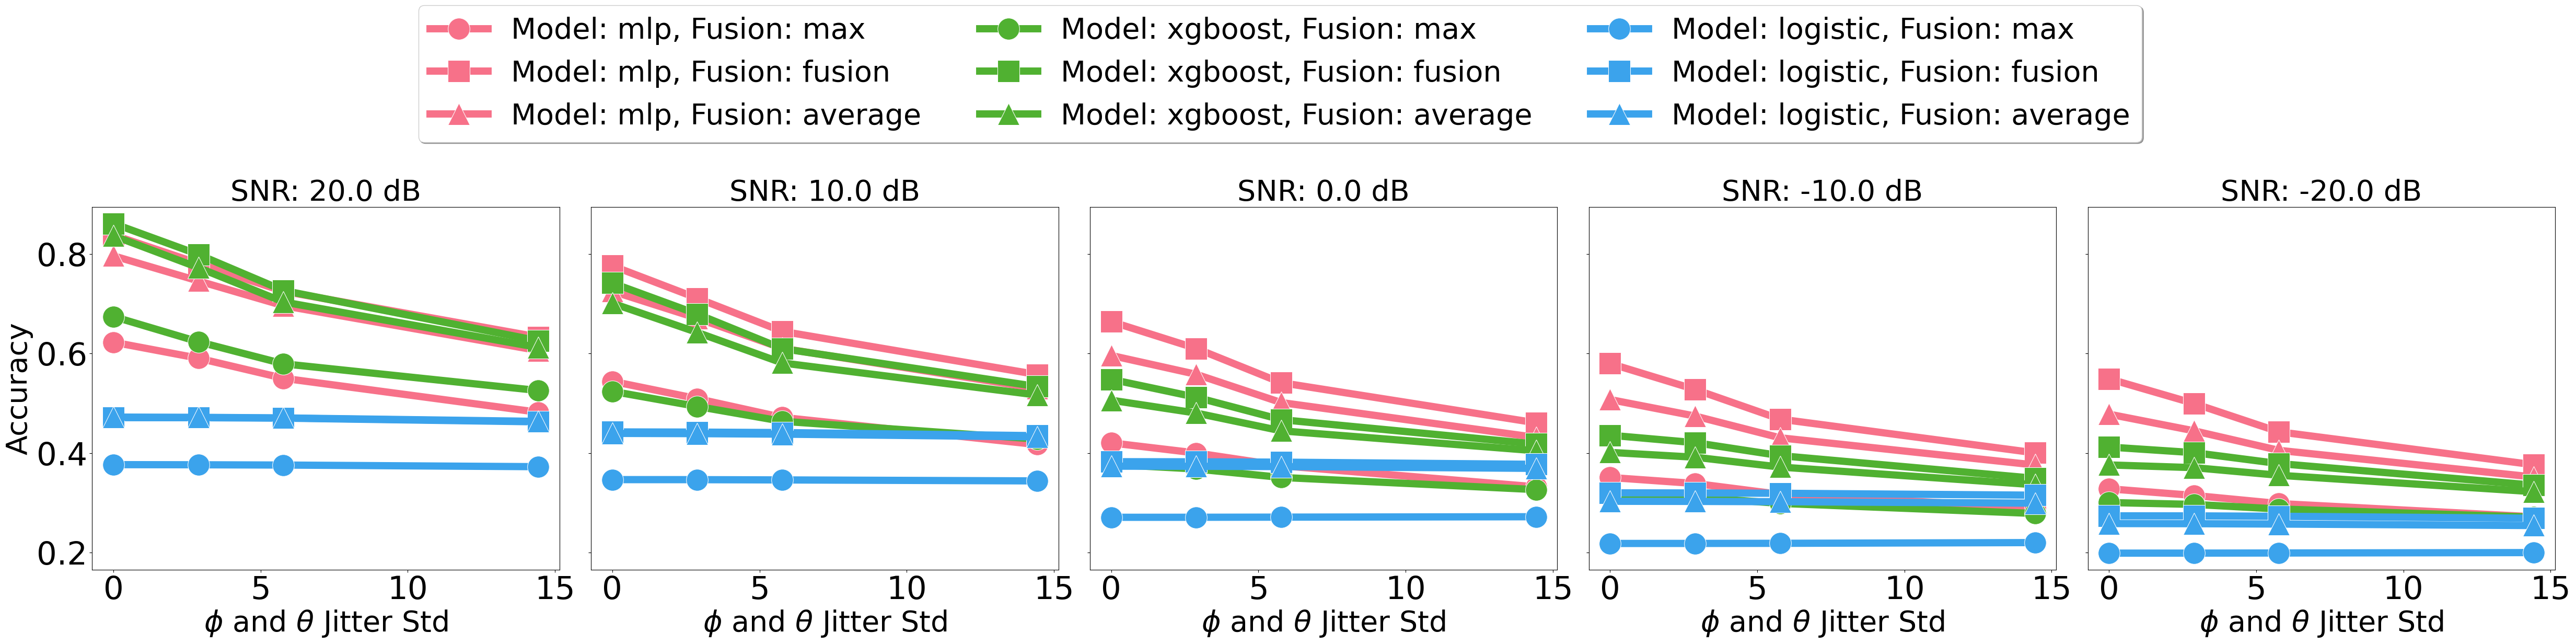

In [76]:
filtered_data = df[
    (df['n_radars'] == 20) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn")
]

# Create subplots for each SNR_constraint
unique_constraints = filtered_data['SNR_constraint'].unique()
unique_models = filtered_data['model_choice'].unique()
unique_fusion_methods = filtered_data['fusion_method'].unique()

# fig, axes = plt.subplots(len(unique_constraints), 1, figsize=(7.5, 30))
fig, axes = plt.subplots( 1,len(unique_constraints), figsize=(50,10),sharey=True)

SMALL_SIZE = 40
plt.rc('xtick', labelsize=SMALL_SIZE*1.1)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE*1.1)  
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)     # fontsize of the x and y labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=SMALL_SIZE) 


markers = ['o', 's', '^', 'v', 'D']  # Different markers for fusion methods
marker_dict = {fusion_method: marker for fusion_method, marker in zip(unique_fusion_methods, markers)}

colors = sns.color_palette("husl", len(unique_models))  # Different colors for models
color_dict = {model: color for model, color in zip(unique_models, colors)}

for i, constraint in enumerate(unique_constraints):
    ax = axes[i]
    for model in unique_models:
        model_color = color_dict[model]
        for fusion_method in unique_fusion_methods:
            data_subset = filtered_data[
                (filtered_data['model_choice'] == model) &
                (filtered_data['SNR_constraint'] == constraint) &
                (filtered_data['fusion_method'] == fusion_method)
            ]

            marker = marker_dict[fusion_method]
            line = sns.lineplot(
                data=data_subset,
                x=np.sqrt(data_subset['azimuth_jitter_width']**2 / 12),
                y='accuracy',
                label=f"Model: {model}, Fusion: {fusion_method}",
                marker=marker,
                color=model_color,
                ax=ax,
                legend=None,
                markersize=30,
                linewidth=10
            )
    
#     ax.set_xticklabels(ax.get_xticklabels(),rotation=45)    
#     ax.set_ylim([0.2,0.9])
    ax.set_title(f"SNR: {constraint} dB",fontsize=SMALL_SIZE)
    ax.set_xlabel('$\phi$ and $\\theta$ Jitter Std',fontsize=SMALL_SIZE)
    ax.set_ylabel('Accuracy',fontsize=SMALL_SIZE)

# Get all unique labels for the legend
lines = [line for line in ax.get_lines()]
labels = [line.get_label() for line in lines]
# Create a single legend for the entire figure
fig.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.3), fancybox=True, shadow=True, ncol=3,prop={'size':SMALL_SIZE})


plt.tight_layout(w_pad=1)
plt.savefig(os.path.join(save_folder,"fusion_method.pdf"),dpi=1600,bbox_inches="tight")
plt.show()

## Acc vs SNR

In [97]:
df.elevation_jitter_width

0       50.0
1       10.0
2       20.0
3       50.0
4        0.0
        ... 
4315    20.0
4316    50.0
4317    10.0
4318     0.0
4319     0.0
Name: elevation_jitter_width, Length: 4320, dtype: float64

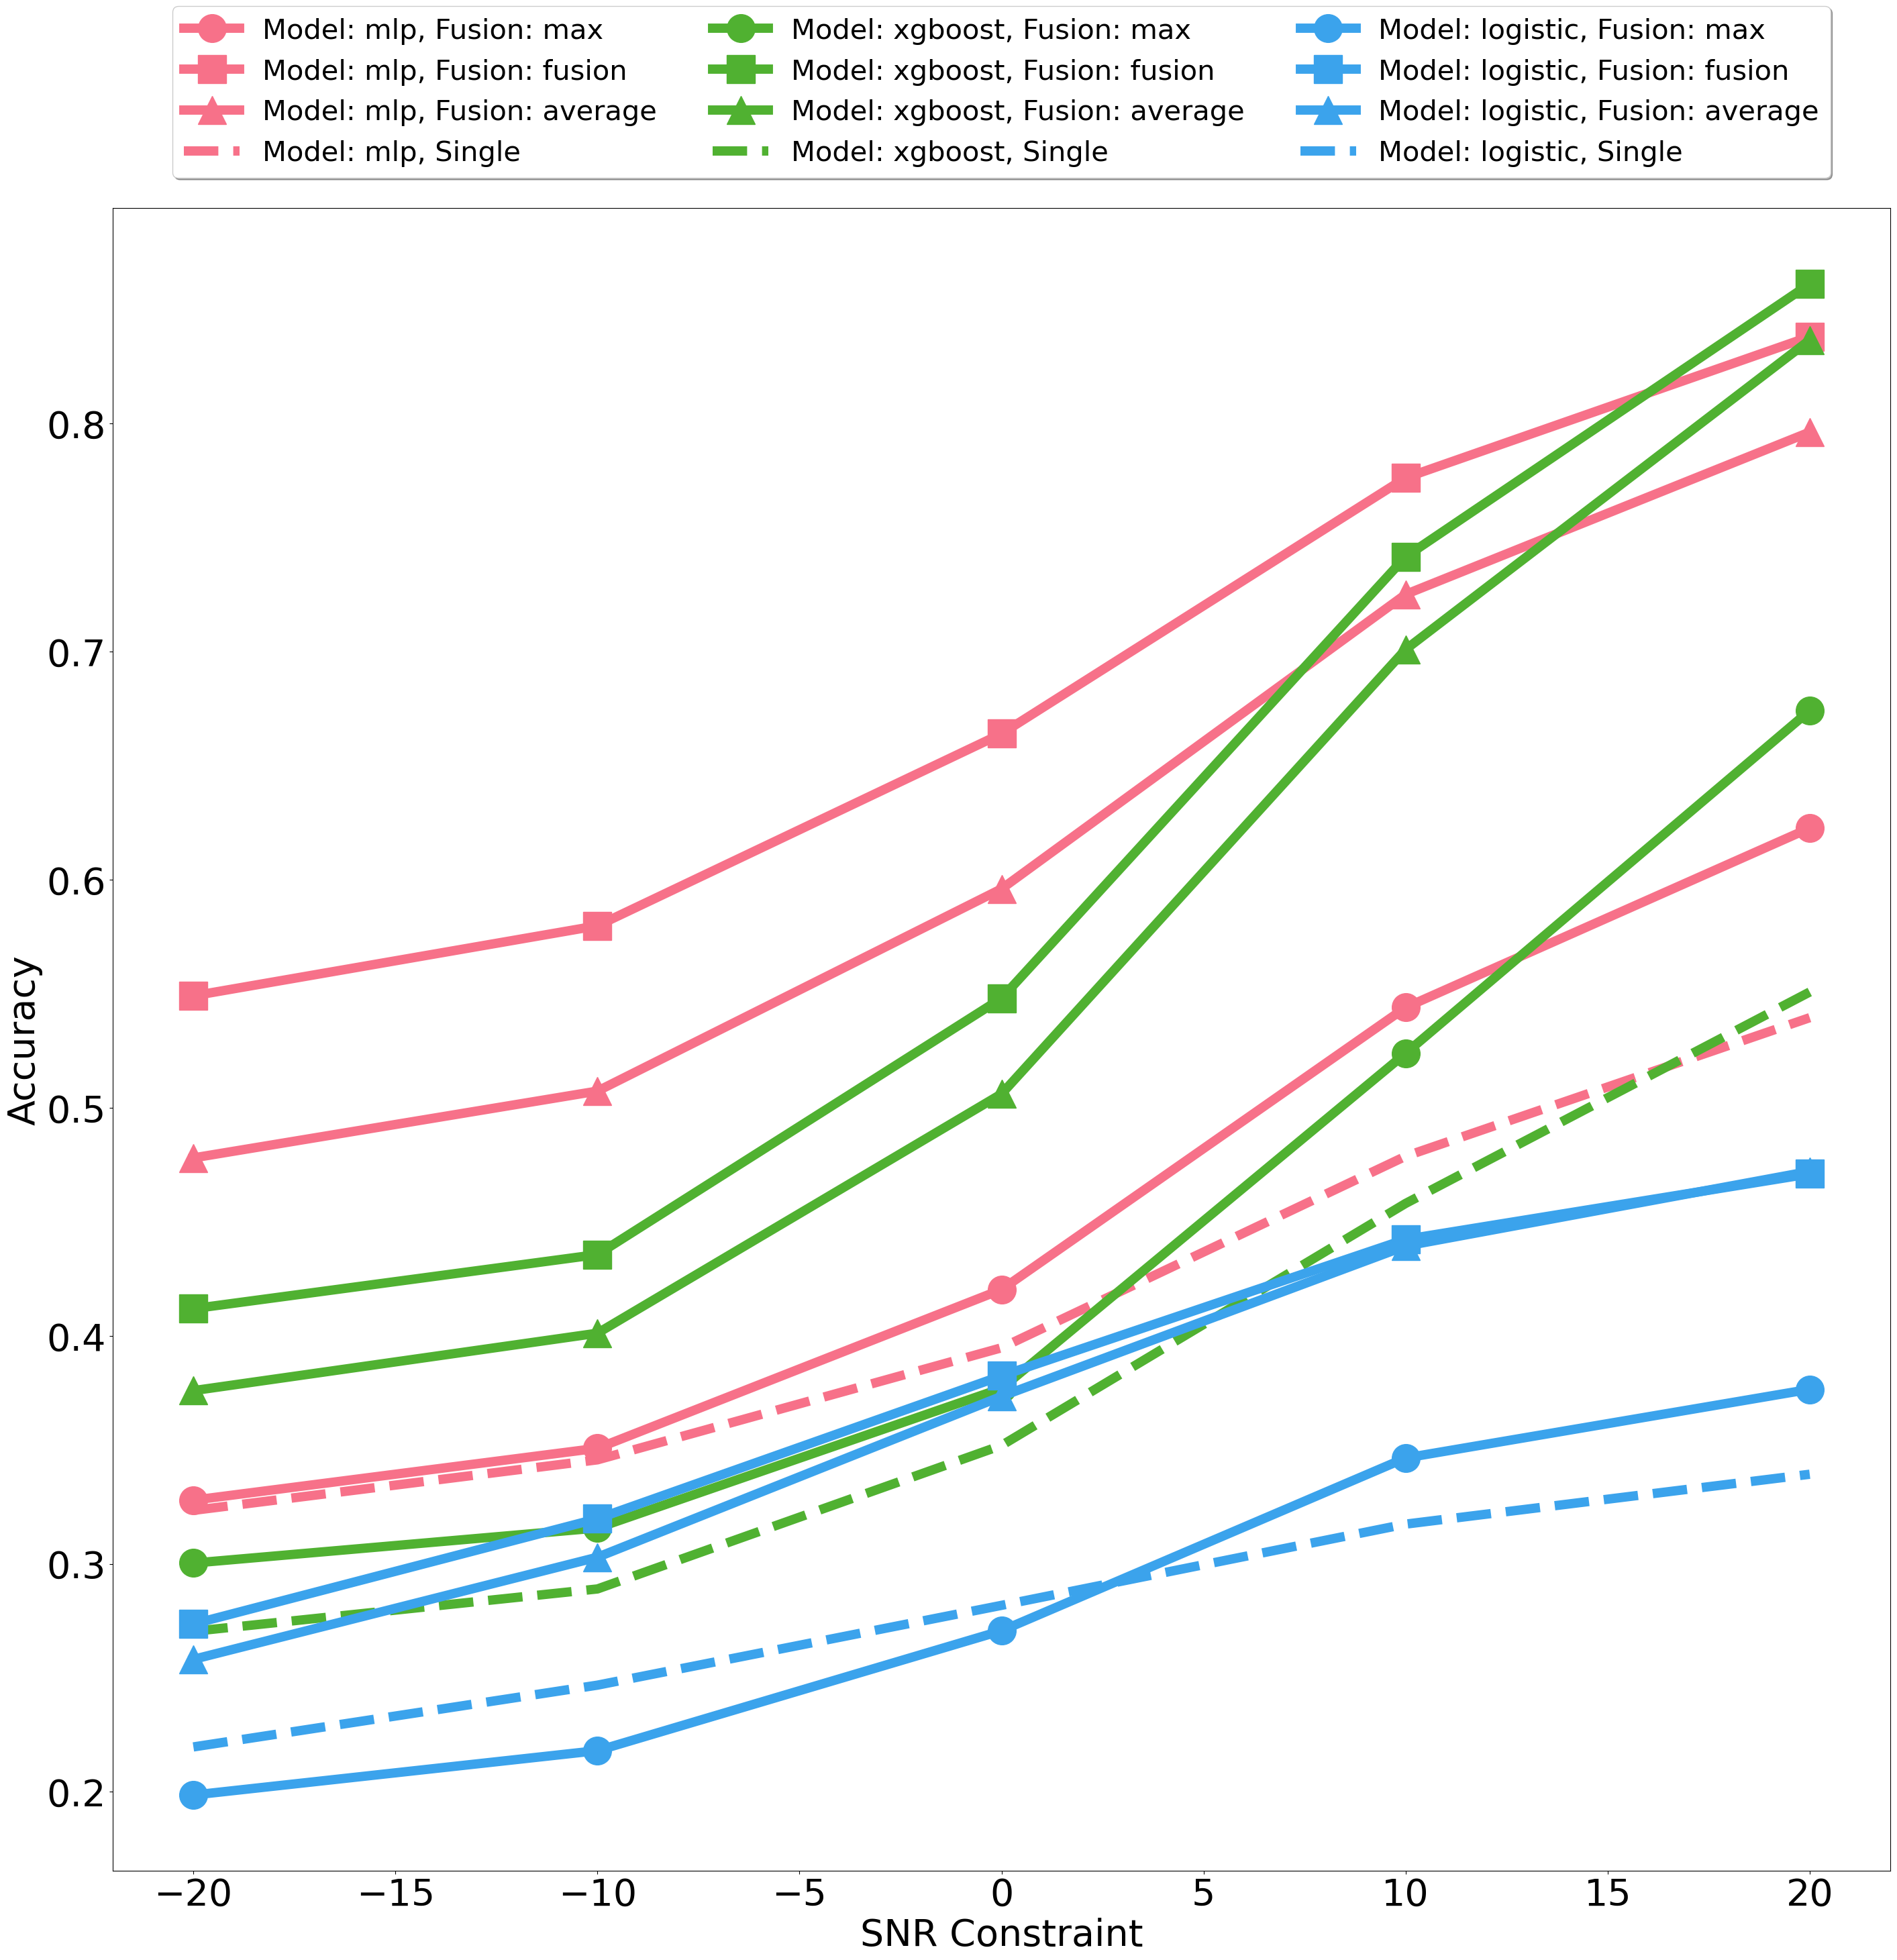

In [146]:
filtered_data = df[
    (df['n_radars'] == 20) &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000) &
    ~(df['model_choice'] == "knn") & 
    (df["elevation_jitter_width"] == 0.0)
]

unique_constraints = filtered_data['SNR_constraint'].unique()
unique_models = filtered_data['model_choice'].unique()
unique_fusion_methods = filtered_data['fusion_method'].unique()

fig, ax = plt.subplots(figsize=(30, 30))
# ax.set_aspect('equal')

SMALL_SIZE = 40
plt.rc('xtick', labelsize=SMALL_SIZE * 1)
plt.rc('ytick', labelsize=SMALL_SIZE * 1.)
plt.rc('font', size=SMALL_SIZE)
plt.rc('axes', titlesize=SMALL_SIZE)
plt.rc('axes', labelsize=SMALL_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=SMALL_SIZE)

markers = ['o', 's', '^', 'v', 'D']
marker_dict = {fusion_method: marker for fusion_method, marker in zip(unique_fusion_methods, markers)}

colors = sns.color_palette("husl", len(unique_models))
color_dict = {model: color for model, color in zip(unique_models, colors)}

for model in unique_models:
    model_color = color_dict[model]
    for fusion_method in unique_fusion_methods:
        data_subset = filtered_data[
            (filtered_data['model_choice'] == model) &
            (filtered_data['fusion_method'] == fusion_method)
        ]
        
        data_subset = data_subset.sort_values(by="SNR_constraint")

        marker = marker_dict[fusion_method]
        ax.plot(
            data_subset['SNR_constraint'],  # Change x-axis to SNR
            data_subset['accuracy'],
            label=f"Model: {model}, Fusion: {fusion_method}",
            marker=marker,
            color=model_color,
            markersize=30,
            linewidth=10
        )
        
    ax.plot(
        data_subset['SNR_constraint'],  # Change x-axis to SNR
        data_subset['accuracy_single'],
        label=f"Model: {model}, Single",
        marker=None,
        color=model_color,
        markersize=30,
        linewidth=10,
        linestyle="--"
    )

ax.set_xlabel('SNR Constraint', fontsize=SMALL_SIZE)
ax.set_ylabel('Accuracy', fontsize=SMALL_SIZE)

# Display the legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.13), fancybox=True, shadow=True, ncol=3, prop={'size': SMALL_SIZE*0.75})
plt.savefig(os.path.join(save_folder,"accuracy_vs_snr.pdf"),dpi=1600,bbox_inches="tight")
plt.tight_layout()
plt.show()

C:\Users\lpott\AppData\Local\Temp\ipykernel_30544\3814958052.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)


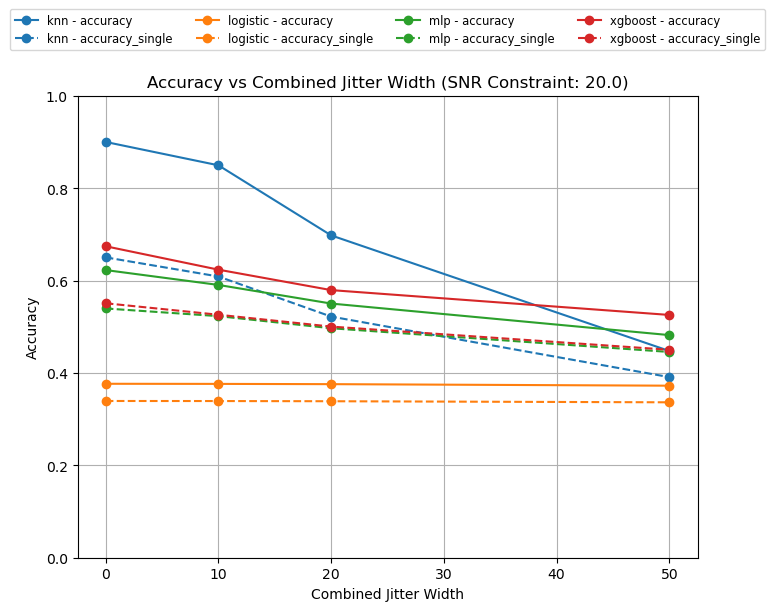

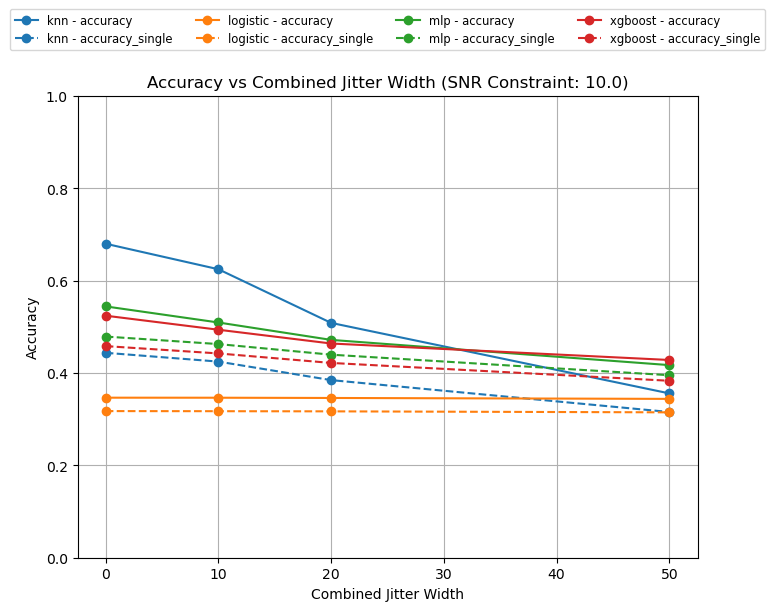

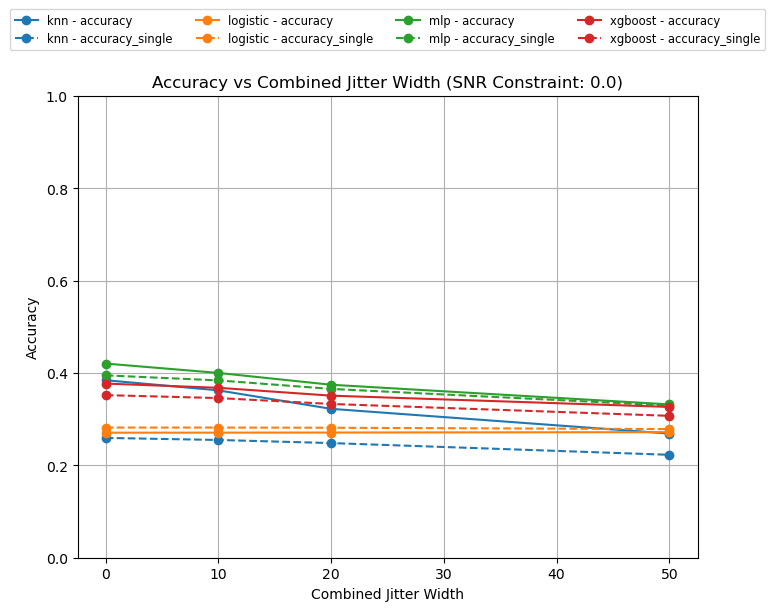

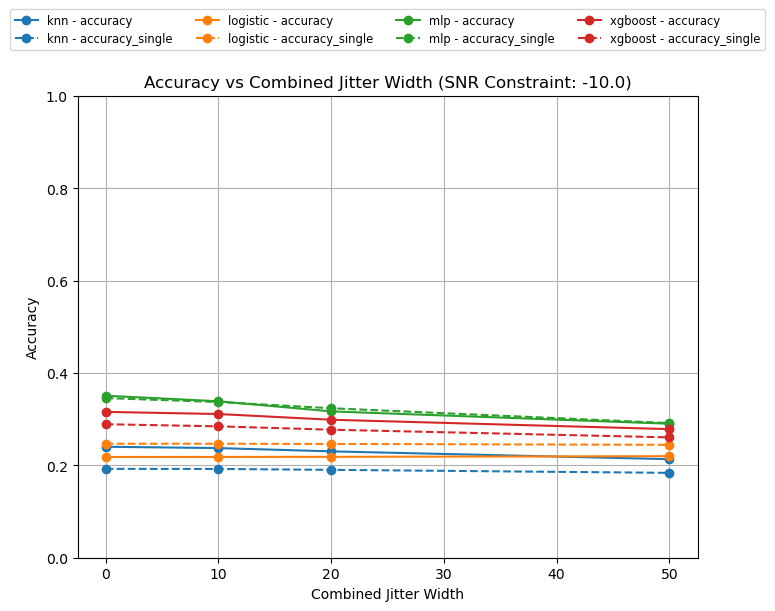

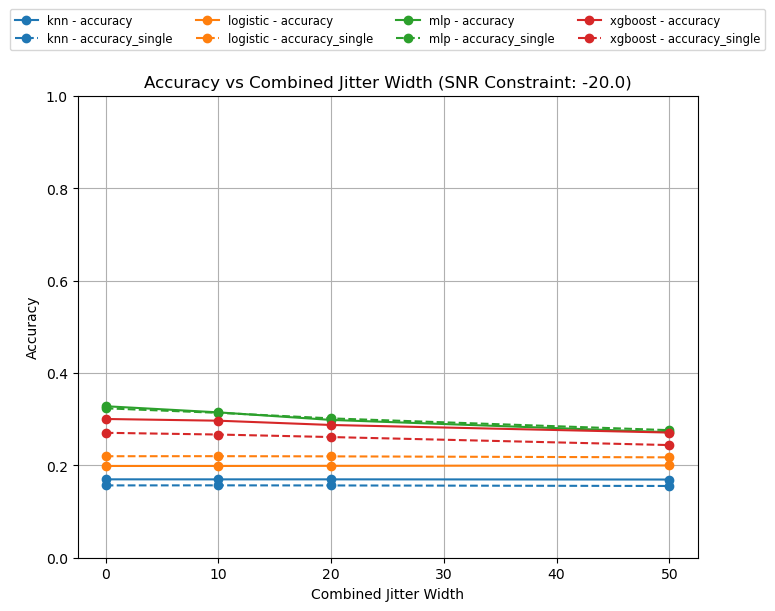

In [147]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)

# Assuming 'df' is your DataFrame containing the data

# Filtering the DataFrame based on the given conditions
filtered_data = df[
    (df['n_radars'] == 20) &
    (df['fusion_method'] == 'max') &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000)
]

# Combine elevation and azimuth jitter widths
filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)

# Get unique SNR_constraint values
unique_snr_values = filtered_data['SNR_constraint'].unique()

# Assign colors to each unique model
models = sorted(filtered_data['model_choice'].unique())
colors = plt.cm.tab10.colors[:len(models)]  # Using a colormap with sufficient distinct colors
model_color_dict = {model: color for model, color in zip(models, colors)}

# Plotting for each unique SNR_constraint value
for snr_value in unique_snr_values:
    snr_filtered_data = filtered_data[filtered_data['SNR_constraint'] == snr_value]
    
    # Sort the data by combined jitter width
    snr_filtered_data = snr_filtered_data.sort_values(by='combined_jitter_width')
    
    plt.figure(figsize=(8, 6))
    
    for model in models:
        model_data = snr_filtered_data[snr_filtered_data['model_choice'] == model]
        color = model_color_dict[model]  # Get the color for the current model
        
        plt.plot(model_data['combined_jitter_width'], model_data['accuracy'], marker='o', linestyle='-', label=f'{model} - accuracy', color=color)
        
        # Overlay single accuracy onto the plot
        plt.plot(model_data['combined_jitter_width'], model_data['accuracy_single'], marker='o', linestyle='--', label=f'{model} - accuracy_single', color=color)

    plt.xlabel('Combined Jitter Width')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy vs Combined Jitter Width (SNR Constraint: {snr_value})')
    
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    
    # Create a single legend for all plots with consistent colors for each model
    plt.legend(by_label.values(), by_label.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.2), ncol=len(models), fontsize='small')
    
    plt.grid(True)
    plt.ylim([0, 1])
    plt.show()


C:\Users\lpott\AppData\Local\Temp\ipykernel_30544\806611710.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)


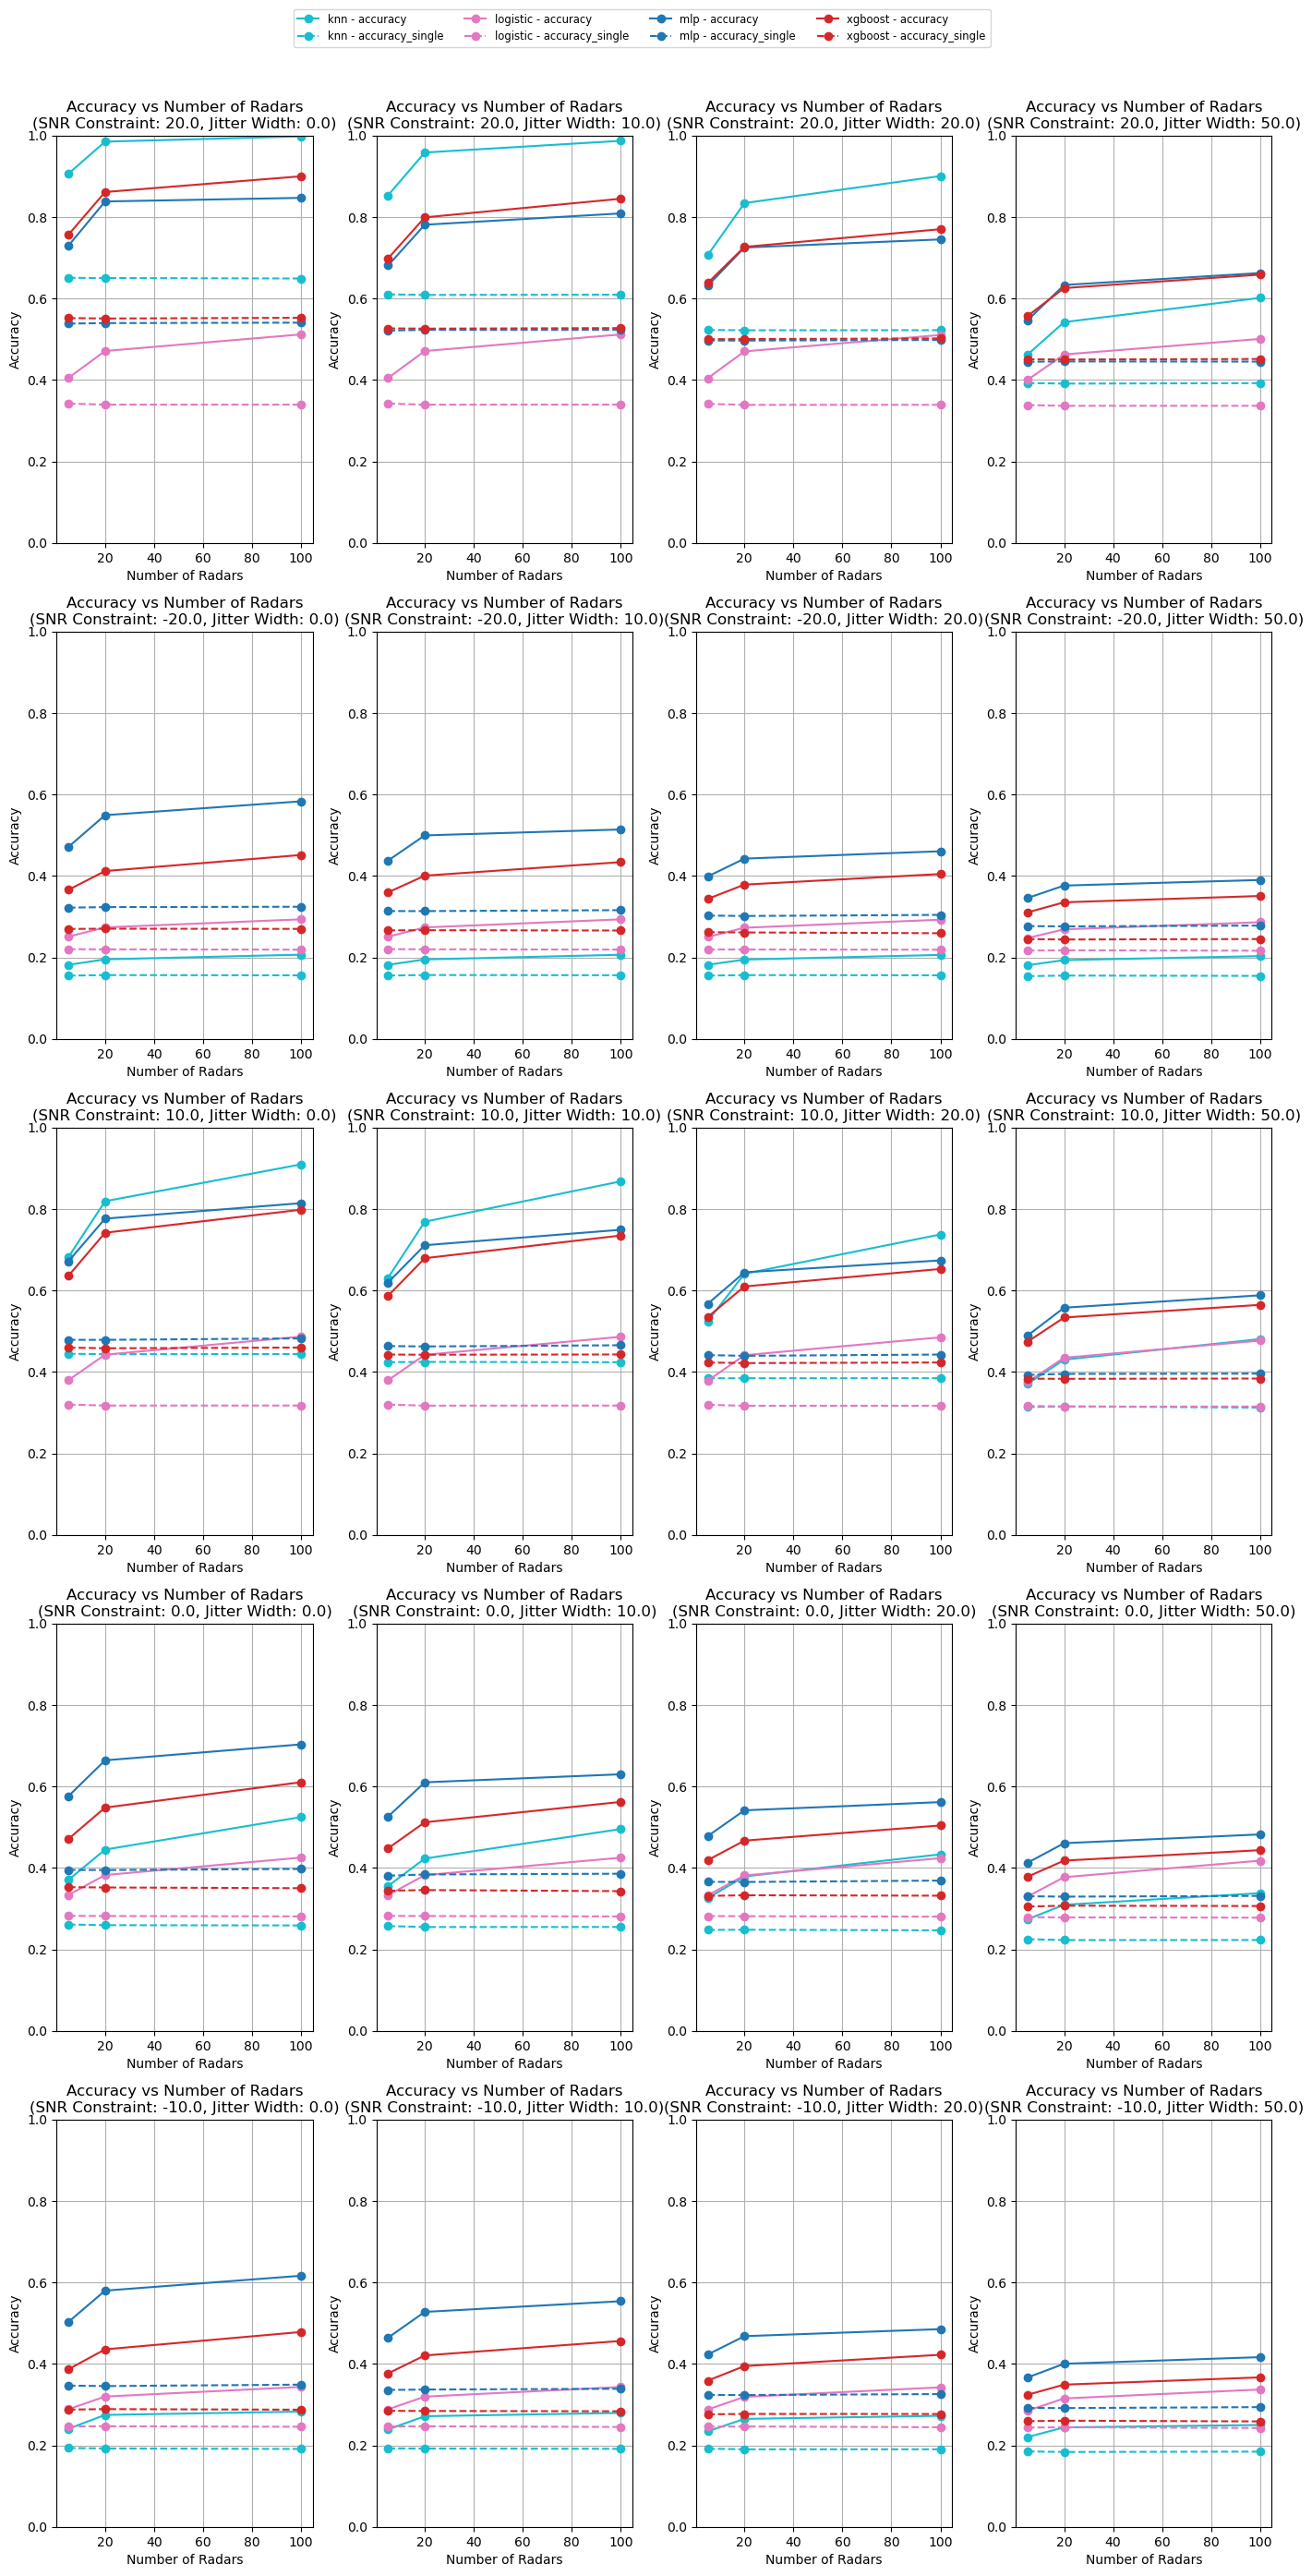

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
# Assuming 'df' is your DataFrame containing the data

# Filtering the DataFrame based on the given conditions
filtered_data = df[
    (df['fusion_method'] == 'fusion') &
    (df['noise_method'] == 'random') &
    (df['color'] == 'color') &
    (df['num_points'] == 10000)
]

# Combine elevation and azimuth jitter widths
filtered_data['combined_jitter_width'] = filtered_data[['elevation_jitter_width', 'azimuth_jitter_width']].mean(axis=1)

# Set the index to 'model_choice' and 'n_radars'
filtered_data.set_index(['model_choice', 'n_radars'], inplace=True)

# Get unique SNR_constraint values
unique_snr_values = filtered_data['SNR_constraint'].unique()

# Assign unique colors to each model
models = filtered_data.index.get_level_values('model_choice').unique()
colors = plt.cm.get_cmap('tab10', len(models))  # Get a colormap with a color for each model
model_color_dict = {model: colors(i) for i, model in enumerate(models)}

# Create a single plot for both elevation and azimuth jitter widths
unique_jitter_widths = np.sort(filtered_data["azimuth_jitter_width"].unique())

fig, axs = plt.subplots(len(unique_snr_values), len(unique_jitter_widths), figsize=(14, 6 * len(unique_snr_values)))

legend_dict = {}  # Dictionary to store unique legend items

for i, snr_value in enumerate(unique_snr_values):
    snr_filtered_data = filtered_data[filtered_data['SNR_constraint'] == snr_value]

    for idx, jitter_width in enumerate(unique_jitter_widths):
        # Plotting number of radars vs. accuracy for each model
        ax = axs[i, idx]
        for model in sorted(models):  # Sort models alphabetically
            model_data = snr_filtered_data.loc[model]
            model_data = model_data.loc[model_data.azimuth_jitter_width == jitter_width]  # Filtering for each model
            model_data = model_data.sort_values('n_radars')  # Sort by number of radars
            color = model_color_dict[model]
            
            line1 = ax.plot(model_data.index, model_data['accuracy'], marker='o', linestyle='-', label=f'{model} - accuracy', color=color)
            line2 = ax.plot(model_data.index, model_data['accuracy_single'], marker='o', linestyle='--', label=f'{model} - accuracy_single', color=color)
            
            # Collect unique legend items
            if f'{model} - accuracy' not in legend_dict:
                legend_dict[f'{model} - accuracy'] = line1[0]
            if f'{model} - accuracy_single' not in legend_dict:
                legend_dict[f'{model} - accuracy_single'] = line2[0]

        ax.set_xlabel('Number of Radars')
        ax.set_ylabel('Accuracy')
        ax.set_title(f'Accuracy vs Number of Radars\n(SNR Constraint: {snr_value}, Jitter Width: {jitter_width})')
        ax.grid(True)
        ax.set_ylim(0, 1)  # Set y-axis limits

# Create a single legend at the top of the figure using unique legend items
fig.legend(legend_dict.values(), legend_dict.keys(), loc='upper center', bbox_to_anchor=(0.5, 1.03), ncol=len(models), fontsize='small')
plt.tight_layout(rect=[0, 0.1, 1, 1])  # Adjust subplot layout
plt.show()